In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

data = pd.read_csv('./House_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
data.shape

(4746, 12)

In [4]:
X = data['Size'].values
Y = data['Rent'].values

-0.004978415869042689 40.60506120766978


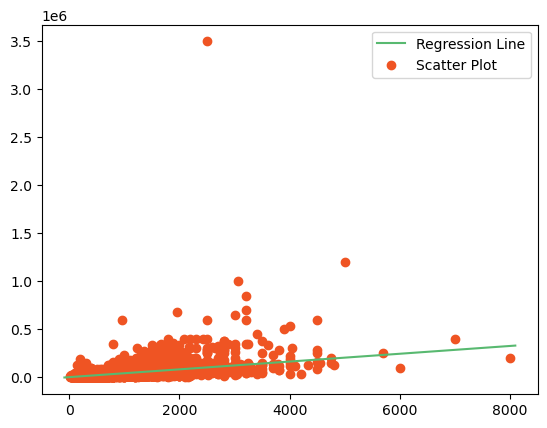

In [5]:
costs = []
thetas_0 = []
thetas_1 = []

m = len(X)
epoch = 80
learning_rate = 0.0000001
theta_0 = 0
theta_1 = 0

for i in range(epoch):
  temp_0 = 0
  temp_1 = 0
  for j in range(m):
    temp_0 += (theta_0 + theta_1*X[j] - Y[j])
    temp_1 += (theta_0 + theta_1*X[j] - Y[j]) * X[j]

  theta_0 = theta_0 - learning_rate * (temp_0) / m
  theta_1 = theta_1 - learning_rate * (temp_1) / m

  thetas_0.append(theta_0)
  thetas_1.append(theta_1)

  sum = 0
  for k in range(m):
    sum_ = (theta_0 + theta_1*X[k] - Y[k]) * ((theta_0 + theta_1*X[k] - Y[k]))
  cost = sum_ / (2 * m)
  costs.append(cost)

max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = theta_1 * x + theta_0

print(theta_0, theta_1)

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c = "#ef5423", label = 'Scatter Plot')
plt.legend()
plt.show()

In [6]:
data.shape

(4746, 12)

In [10]:
def loss(a, b, X, Y):
    return 1/len(X)*(np.sum((a*X + b - Y)**2))

TypeError: loss() missing 2 required positional arguments: 'X' and 'Y'

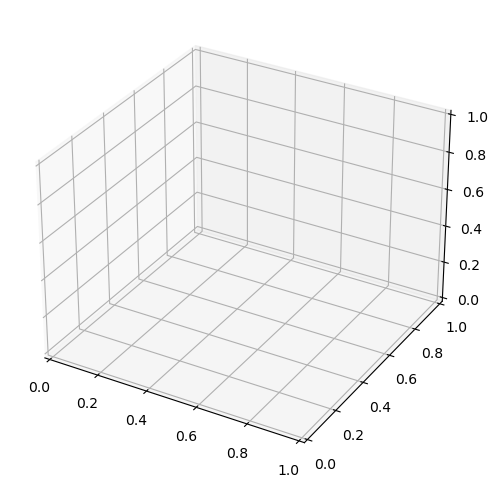

In [19]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1, projection="3d")

a = np.arange(-350, 350, 5)
b = np.arange(-250000, 250000, 20000)

zs = np.array([loss(a, b, loss(a, b)) for a, b in zip(np.ravel(A), np.ravel(B))])

loss_vals = zs.reshape(A.shape)

surf = ax.plot_surface(A, B, loss_vals, cmap="plasma", rstride=3, cstride=3, edgecolor='none', alpha=0.6)

contour = ax.contour(A, B, loss_vals, 30, cmap="plasma", linestyles="dashed", offset=0)

ax.view_init(30, 230)

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cost', rotation="vertical")
ax.set_title('Contour Plot')

plt.tick_params(axis='both', which='major', labelsize=7)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()

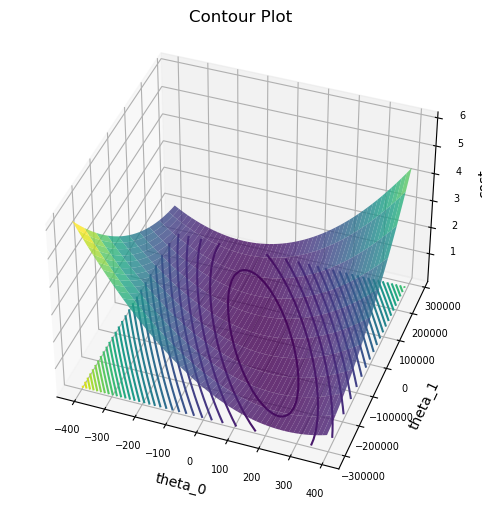

In [20]:
def loss(a,b):
  return 1/len(X)*(np.sum((a*X + b - Y)**2))  

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection="3d")
a = np.arange(-400, 400, 5)
b = np.arange(-300000, 300000, 20000)
A, B = np.meshgrid(a, b) # makes repetetive 2D arrays from a and b
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss_vals = zs.reshape(A.shape)

ax.plot_surface(A, B, loss_vals, cmap="viridis", rstride=3, cstride=3,edgecolor='none',alpha=0.8)
ax.contour(A, B, loss_vals, 30, cmap="viridis", linestyles="solid", offset=0)
ax.view_init(40, 290)

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cost',rotation="vertical")
ax.set_title('Contour Plot')
# ax.scatter3D(2.95, 2.95, 6.1589, c="r",s=90)
plt.tick_params(axis='both', which='major', labelsize=7)